In [14]:
import pandas as pd # for data analytics
import numpy as np # for numerical computation
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
from numpy import where
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, classification_report,confusion_matrix, precision_recall_curve

In [15]:
data = pd.read_csv("https://raw.githubusercontent.com/renatojmf/Machine-Learning/main/data.csv",encoding = "ISO-8859-1")
data["defects"] = data["defects"].astype(int)
data.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,1.30,1.30,2,2,2,2,1.2,1.2,1.2,1.2,1.4,0
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1,1,1,1,1.0,1.0,1.0,1.0,1.0,1
2,24.0,5.0,1.0,3.0,63.0,309.13,0.11,9.50,32.54,2936.77,0.10,163.15,1,0,6,0,15.0,15.0,44.0,19.0,9.0,0
3,20.0,4.0,4.0,2.0,47.0,215.49,0.06,16.00,13.47,3447.89,0.07,191.55,0,0,3,0,16.0,8.0,31.0,16.0,7.0,0
4,24.0,6.0,6.0,2.0,72.0,346.13,0.06,17.33,19.97,5999.58,0.12,333.31,0,0,3,0,16.0,12.0,46.0,26.0,11.0,0


In [16]:
non_fraud = data[data['defects']==1]
df_train, val = train_test_split(non_fraud, test_size=0.50, random_state=42)
fraud = data[data['defects']==0]

In [17]:
# input data
model = OneClassSVM(kernel = 'rbf', gamma = 0.001, nu = 0.03).fit(non_fraud)

In [18]:
y_val = non_fraud['defects']
y_fraud = fraud['defects']
y_testval = pd.concat([y_val, y_fraud])
y_testval = np.array(y_testval)

In [19]:
# prediction
y_pred = model.predict(data)
y_pred

array([ 1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [20]:
# filter outlier index
outlier_index = where(y_pred == -1) 
# filter outlier values
outlier_values = data.iloc[outlier_index]
outlier_values

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
2,24.0,5.0,1.0,3.0,63.0,309.13,0.11,9.50,32.54,2936.77,0.10,163.15,1,0,6,0,15.0,15.0,44.0,19.0,9.0,0
3,20.0,4.0,4.0,2.0,47.0,215.49,0.06,16.00,13.47,3447.89,0.07,191.55,0,0,3,0,16.0,8.0,31.0,16.0,7.0,0
4,24.0,6.0,6.0,2.0,72.0,346.13,0.06,17.33,19.97,5999.58,0.12,333.31,0,0,3,0,16.0,12.0,46.0,26.0,11.0,0
5,24.0,6.0,6.0,2.0,72.0,346.13,0.06,17.33,19.97,5999.58,0.12,333.31,0,0,3,0,16.0,12.0,46.0,26.0,11.0,0
6,7.0,1.0,1.0,1.0,11.0,34.87,0.50,2.00,17.43,69.74,0.01,3.87,0,0,1,0,4.0,5.0,6.0,5.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,47.0,3.0,1.0,3.0,256.0,1563.78,0.04,28.00,55.85,43785.90,0.52,2432.55,2,13,2,0,23.0,46.0,144.0,112.0,5.0,1
494,24.0,4.0,3.0,3.0,107.0,587.63,0.05,19.13,30.72,11241.58,0.20,624.53,1,7,4,0,22.0,23.0,67.0,40.0,7.0,1
495,82.0,11.0,3.0,10.0,475.0,3155.83,0.02,44.71,70.59,141084.24,1.05,7838.01,9,59,35,0,32.0,68.0,285.0,190.0,21.0,1
496,10.0,2.0,1.0,1.0,32.0,150.41,0.15,6.50,23.14,977.69,0.05,54.32,1,12,4,0,13.0,13.0,19.0,13.0,3.0,1


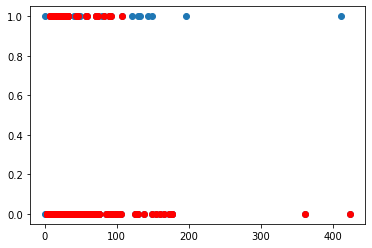

In [21]:
# visualize outputs
plt.scatter(data["loc"], data["defects"])
plt.scatter(outlier_values["loc"], outlier_values["defects"], c = "r")

In [23]:
print(classification_report(y_testval, y_pred))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00       449
           1       0.10      0.04      0.06        49

    accuracy                           0.00       498
   macro avg       0.03      0.01      0.02       498
weighted avg       0.01      0.00      0.01       498

